In [1]:
import findspark

findspark.init()

import os
import sys
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
from pyspark.sql.functions import desc
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql.functions import when, lit, col
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold


In [2]:
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("Python Spark SQL Pipeline Recommender") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()
    return spark

spark = init_spark()

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt



In [28]:
testConfidence = pd.read_csv('confidence_eval++.csv')


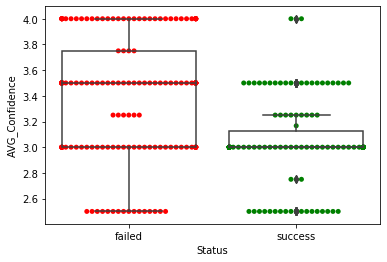

In [29]:
sns.boxplot(x="Status", y="AVG_Confidence", data=testConfidence, boxprops={'facecolor':'None'})
sns.swarmplot(x="Status", y="AVG_Confidence", data=testConfidence,palette=sns.color_palette(['red', 'green']), zorder=.5)


In [17]:
successDF = testConfidence.loc[testConfidence['Status'] == 'success']
failDF = testConfidence.loc[testConfidence['Status'] == 'failed']

In [7]:
successConfidences = successDF['AVG_Confidence'].tolist()
failConfidences = failDF['AVG_Confidence'].tolist()

In [15]:
from statistics import mean
print(max(successConfidences))
print(mean(failConfidences))

4.0
3.3863636363636362


In [9]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(failConfidences,successConfidences)
print('stat: ', stat)
print('p: ', p) #A p-value is the probability that the results from your sample data occurred by chance, In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.

stat:  7.115769340702566
p:  8.980828823864055e-12


In [30]:
#testConfidence = pd.read_csv('confidence_eval++.csv')
testConfidence = pd.read_csv('Fraction Rate Report.csv')

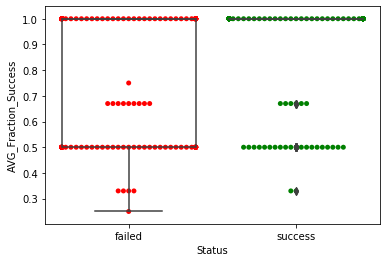

In [31]:
sns.boxplot(x="Status", y="AVG_Fraction_Success", data=testConfidence, boxprops={'facecolor':'None'})
sns.swarmplot(x="Status", y="AVG_Fraction_Success", data=testConfidence,palette=sns.color_palette(['red', 'green']), zorder=.05)

In [32]:
successDF = testConfidence.loc[testConfidence['Status'] == 'success']
failDF = testConfidence.loc[testConfidence['Status'] == 'failed']

In [34]:
successConfidences = successDF['AVG_Fraction_Success'].tolist()
failConfidences = failDF['AVG_Fraction_Success'].tolist()

In [35]:
from statistics import mean
print(max(successConfidences))
print(mean(failConfidences))

1.0
0.775


In [36]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(failConfidences,successConfidences)
print('stat: ', stat)
print('p: ', p) #A p-value is the probability that the results from your sample data occurred by chance, In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.

stat:  -4.6685801050895215
p:  4.668755391568243e-06
